In [59]:
# import libraries
import numpy as np
import pandas as pd
import statsmodels as sm
import plotly.express as px
import os
import seaborn as sns

# Reading Data

In [155]:
# read data
cwd = os.getcwd()
df = pd.read_excel('realEstate2018.xlsx')
df.head()

,Municipalities,waste total,collected waste,indifferent waste,unemployment,tourism,crime,wage,bank evaluation M2,tax,purchasing power,population
0,Portugal,5213148,1064419,4148729,339035,657.9,32.4,967,842,146.8,100.0,"10,283,822"
1,Continente,4944673,993852,3950821,315093,584.4,32.1,970.4,841,149.2,100.7,9786312
2,Norte,1644625,260192,1384433,137025,273.6,28.3,887.4,799,120.2,92.1,3574394
3,Alto Minho,105477,14922,90555,4890,313.3,28.6,802.9,773,115.1,79.7,231566
4,Arcos de Valdevez,7973,1004,6969,530,356.9,22.7,761.2,690,96.9,67.8,21057


# Cleaning Data

In [13]:
#Set the index to the Municipalities
df.set_index('Municipalities', inplace=True)

In [14]:
#Dropping the aggregated regions and the metropolitan areas
df.drop(index='Norte', inplace=True)
df.drop(index='Continente', inplace=True)
df.drop(index='Área Metropolitana de Lisboa', inplace=True)
df.drop(index='Área Metropolitana do Porto', inplace=True)
df.drop(index='Centro', inplace=True)
df.drop(index='Portugal', inplace=True)

In [15]:
df.head()

,waste total,collected waste,indifferent waste,unemployment,tourism,crime,wage,bank evaluation M2,tax,purchasing power,population
Municipalities,,,,,,,,,,,
Alto Minho,105477,14922,90555,4890,313.3,28.6,802.9,773,115.1,79.7,231566
Arcos de Valdevez,7973,1004,6969,530,356.9,22.7,761.2,690,96.9,67.8,21057
Caminha,11132,1068,10064,361,586.7,33.4,762.6,798,180.2,78.9,15885
Melgaço,3574,620,2954,110,571.5,23.4,743.8,...,85.1,62.0,8197
Monção,7724,1018,6706,307,190.9,23.1,723.4,642,78.0,70.2,17972


In [16]:
#Clean data
df['bank evaluation M2'] = df['bank evaluation M2'].replace('x', 0)
df['bank evaluation M2'] = df['bank evaluation M2'].replace('...', 0)
df['unemployment'] = df['unemployment'].replace('x', 0)
df['wage'] = df['wage'].replace('x', 0)
df['tourism'] = df['tourism'].replace('-', 0)
df['waste total'] = df['waste total'].replace('x', 0)
df['collected waste'] = df['collected waste'].replace('x', 0)
df['indifferent waste'] = df['indifferent waste'].replace('x', 0)

 
#Convert to float
df['bank evaluation M2'] = df['bank evaluation M2'].astype(float) 
df['unemployment'] = df['unemployment'].astype(float)
df['tourism'] = df['tourism'].astype(float)
df['wage'] = df['wage'].astype(float)
df['waste total'] = df['waste total'].astype(float)
df['collected waste'] = df['collected waste'].astype(float)
df['indifferent waste'] = df['indifferent waste'].astype(float)
df['population'] = df['population'].astype(float)

 #Replace 0s with mean of column
df['bank evaluation M2'] = df['bank evaluation M2'].replace(0, df['bank evaluation M2'].mean())
df['unemployment'] = df['unemployment'].replace(0, df['unemployment'].mean())
df['wage'] = df['wage'].replace(0, df['wage'].mean())
df['tourism'] = df['tourism'].replace(0, df['tourism'].mean())
df['waste total'] = df['waste total'].replace(0, df['waste total'].mean())
df['collected waste'] = df['collected waste'].replace(0, df['collected waste'].mean())
df['indifferent waste'] = df['indifferent waste'].replace(0, df['indifferent waste'].mean())


In [17]:
#View the nulls
df.isnull().sum()

#drop nulls
df.dropna(inplace=True)

In [18]:
df.dtypes

waste total           float64
collected waste       float64
indifferent waste     float64
unemployment          float64
tourism               float64
crime                 float64
wage                  float64
bank evaluation M2    float64
tax                   float64
purchasing power      float64
population            float64
dtype: object

In [19]:
#Create new variables
df['waste collected %'] = df['collected waste']/df['waste total']
df['uneployment rate %'] = df['unemployment']/df['population']

#Drop irrelevant variables
df.drop(columns=['collected waste', 'indifferent waste', 'waste total'], inplace=True)

In [20]:
df.head()

,unemployment,tourism,crime,wage,bank evaluation M2,tax,purchasing power,population,waste collected %,uneployment rate %
Municipalities,,,,,,,,,,
Alto Minho,4890.0,313.3,28.6,802.9,773.000000,115.1,79.7,231566.0,0.141472,0.021117
Arcos de Valdevez,530.0,356.9,22.7,761.2,690.000000,96.9,67.8,21057.0,0.125925,0.025170
Caminha,361.0,586.7,33.4,762.6,798.000000,180.2,78.9,15885.0,0.095940,0.022726
Melgaço,110.0,571.5,23.4,743.8,543.057803,85.1,62.0,8197.0,0.173475,0.013420
Monção,307.0,190.9,23.1,723.4,642.000000,78.0,70.2,17972.0,0.131797,0.017082


# EDA

In [54]:
px.scatter(df, x = 'purchasing power', y='bank evaluation M2', trendline='ols', title='Purchasing Power vs Bank Evaluation M2')

In [154]:
eval_bar = px.bar(df, y='bank evaluation M2', x=df.index, color='bank evaluation M2', title='Bank Evaluation by Municipality')
eval_bar.show()

In [143]:
unique_df = df.index.duplicated().sum()
unique_df = df.loc[~df.index.duplicated(), :]

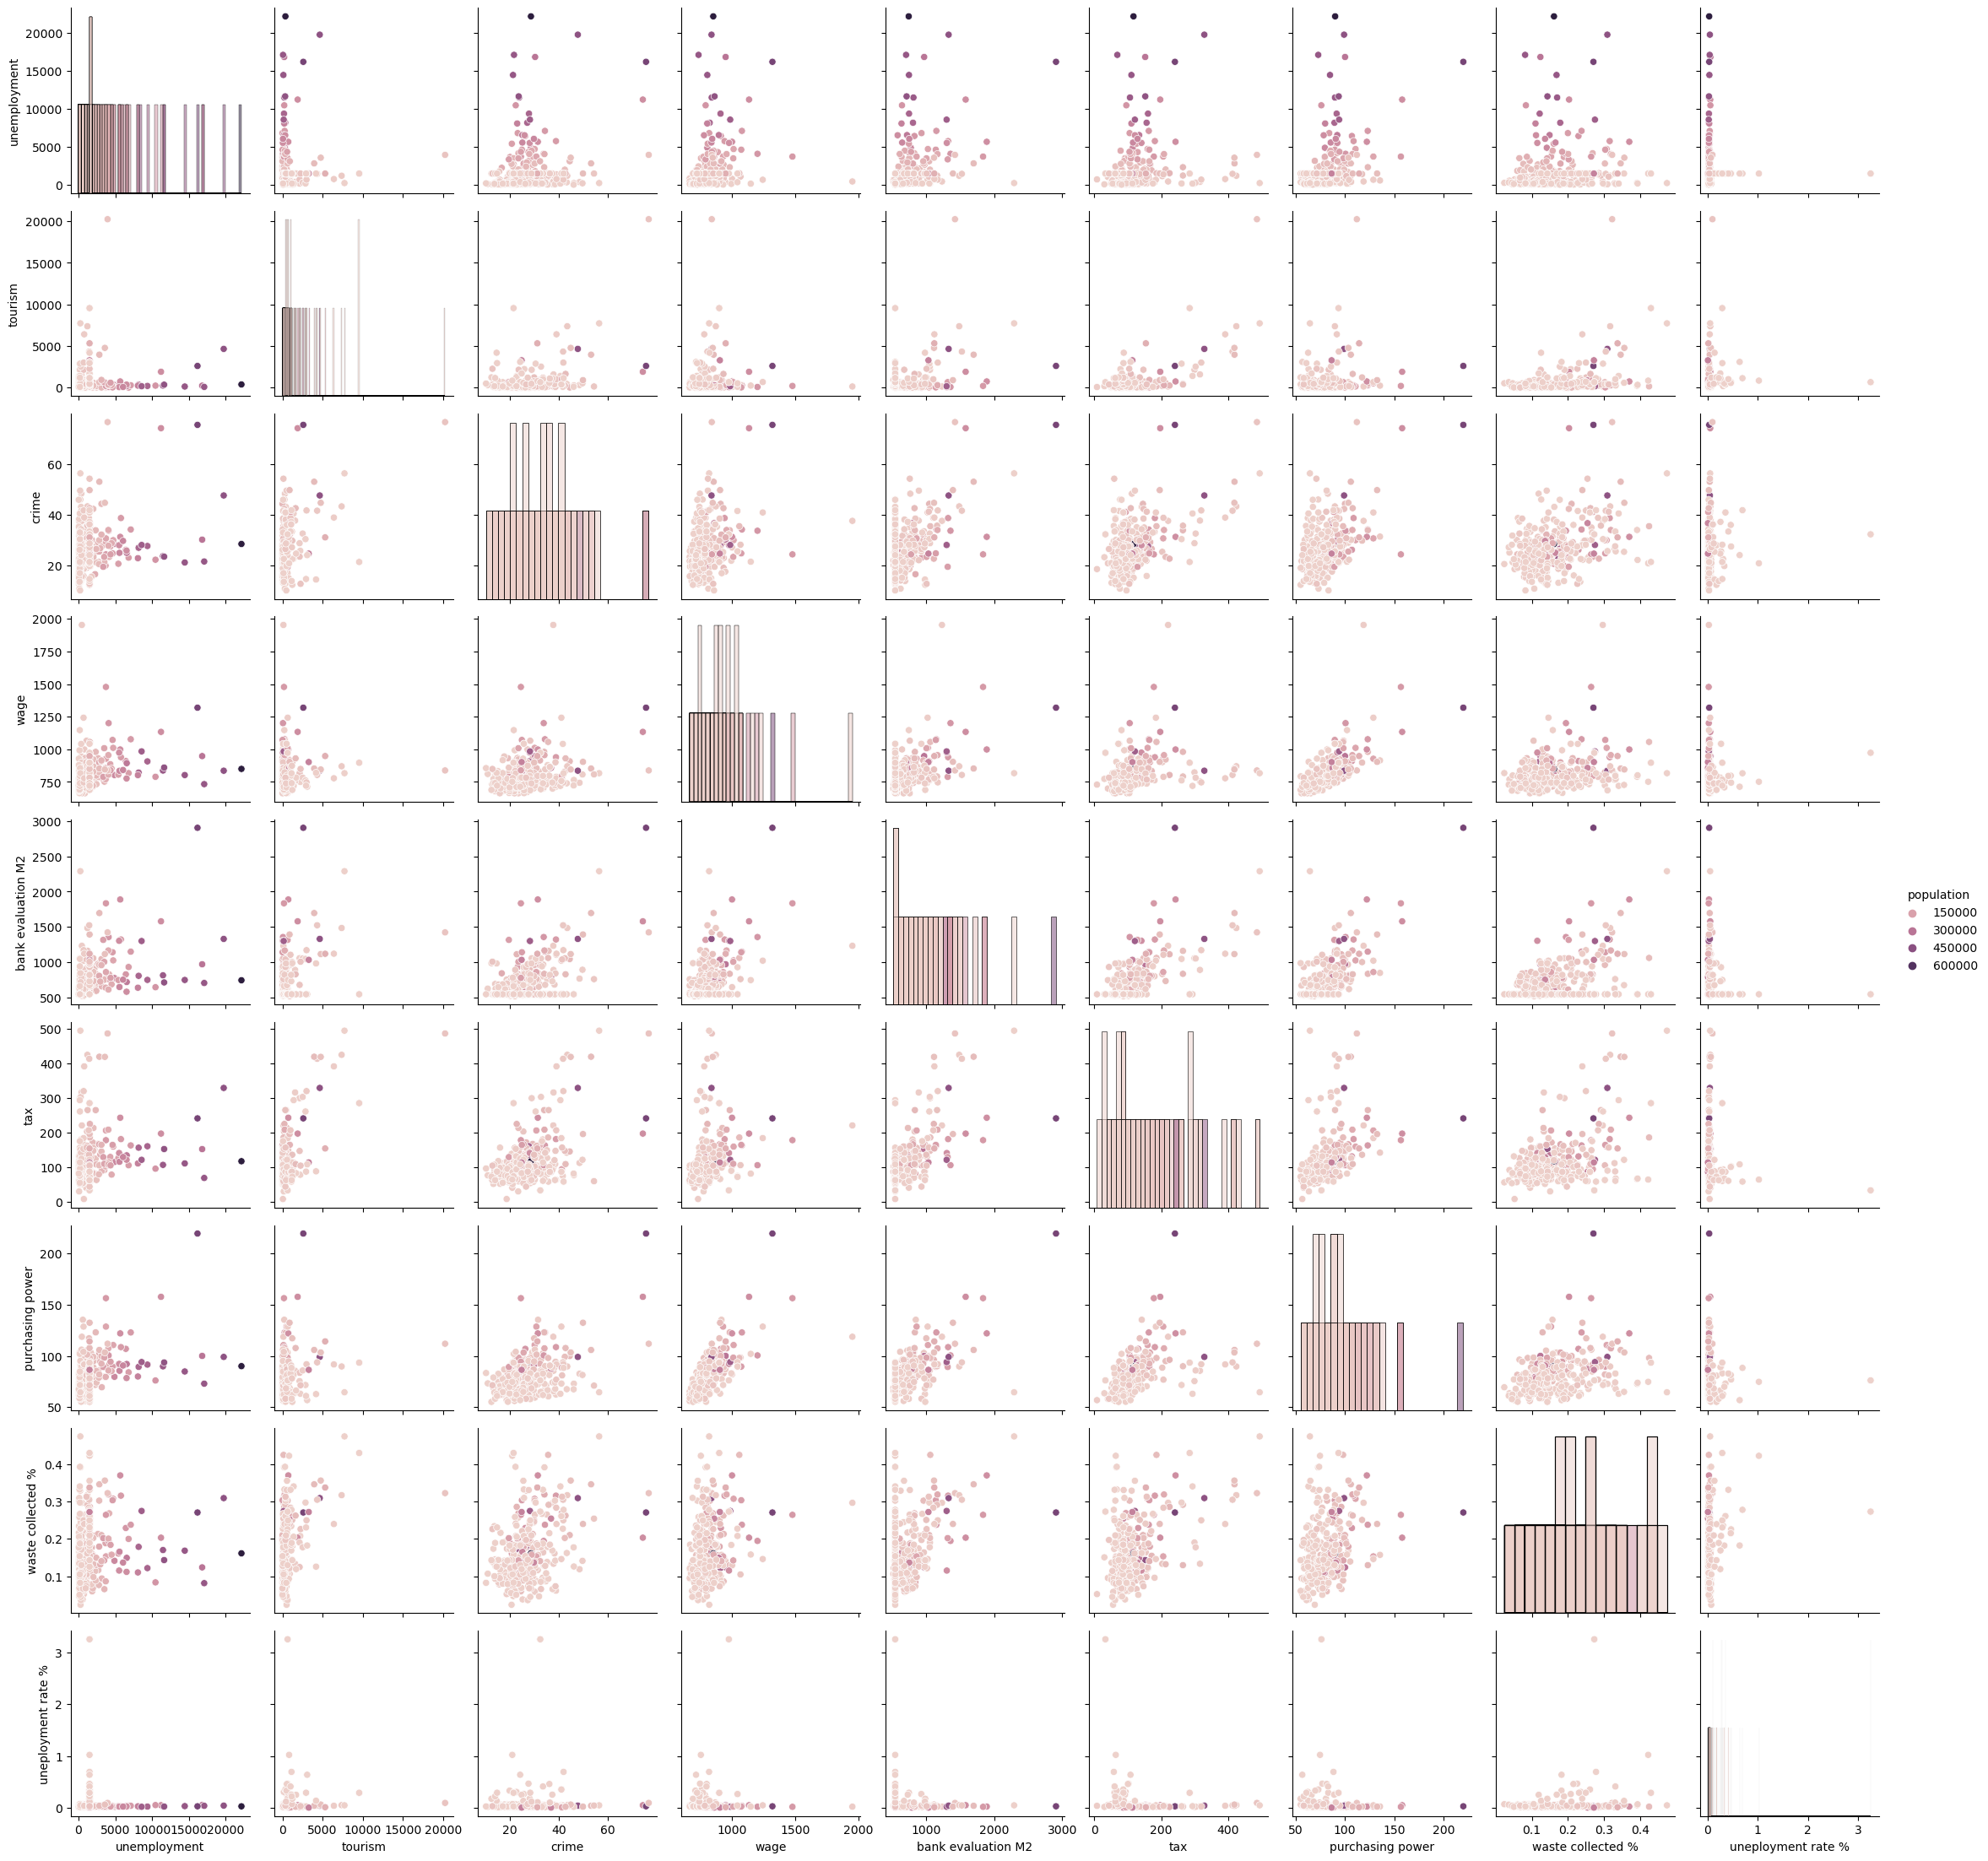

In [144]:
g = sns.PairGrid(unique_df, hue="population")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


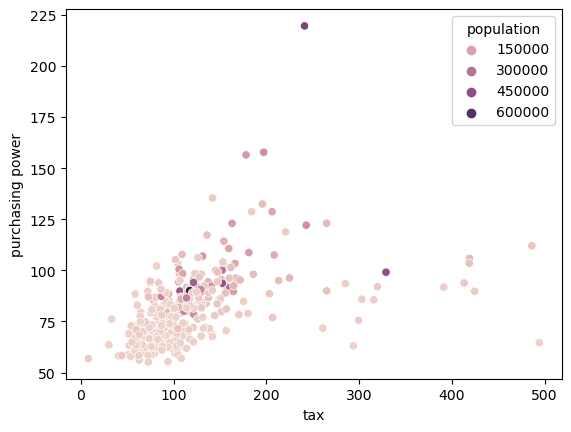

In [150]:
purchasing_tax = sns.scatterplot(data=df, x="tax", y="purchasing power", hue="population")

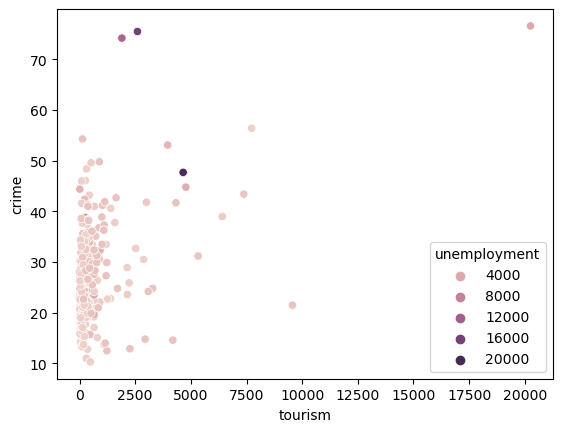

In [149]:
crime_tourism = sns.scatterplot(data=df, x="tourism", y="crime", hue="unemployment")

# Build and Fit OLS Model


In [86]:
# create and fit model
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df['bank evaluation M2']
x = df[['wage', 'tourism', 'tax', 'crime', 'purchasing power', 'population' ,'waste collected %', 'uneployment rate %']]

model1 = sm.OLS(y, x)
results1 = model1.fit()
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     bank evaluation M2   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              954.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                   2.36e-226
Time:                        11:49:43   Log-Likelihood:                         -2242.3
No. Observations:                 345   AIC:                                      4501.
Df Residuals:                     337   BIC:                                      4531.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wage                   0.1177      0.077      1.536      0.125      -0.033       0.269
tourism               -0.0008      0.008     -0.106      0.916      -0.016       0.014
tax                    1.4651      0.202      7.238      0.000       1.067       1.863
crime                  3.1999      1.183      2.704      0.007       0.872       5.527
purchasing power       3.8566      0.854      4.518      0.000       2.177       5.536
population             0.0005      0.000      5.221      0.000       0.000       0.001
waste collected %    280.0054    132.569      2.112      0.035      19.239     540.772
uneployment rate %   -54.2803     35.982     -1.509      0.132    -125.057      16.497
==============================================================================
Omnibus:                      141.745   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.456
Skew:                           1.551   Prob(JB):                    6.22e-215
Kurtosis:                      10.681   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model1.params

wage                    0.117737
tourism                -0.000811
tax                     1.465083
crime                   3.199866
purchasing power        3.856588
population              0.000543
waste collected %     280.005362
uneployment rate %    -54.280319
dtype: float64

In [25]:
model1.rsquared

0.9577150762391542

In [122]:
residuals  = results1.resid
residuals = residuals.tolist()
residuals

np.array(residuals)
mse = np.mean(np.square(residuals))

print('mean square error =', mse)

rmse = np.sqrt(mse)
print('root mse = ', rmse)

mean square error = 25876.645340519357
root mse =  160.8621936333064


<AxesSubplot:ylabel='bank evaluation M2'>

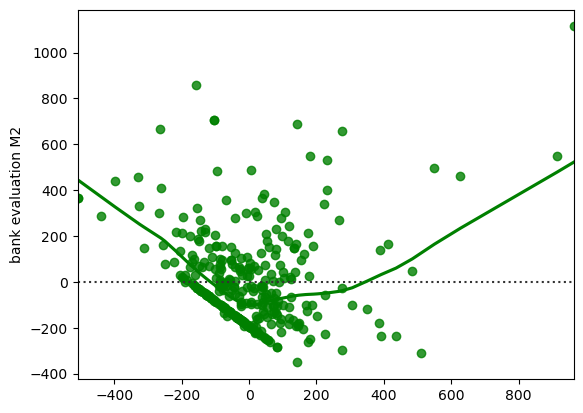

In [123]:
sns.residplot(x= residuals,  y='bank evaluation M2', data=df, lowess=True, color="g")

In [88]:
#Model 2
y2 = df['bank evaluation M2']
x2 = df[[ 'tax', 'crime', 'purchasing power' ,'waste collected %', 'uneployment rate %']]

mymodel2 = sm.OLS(y2, x2)
results2 = mymodel2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     bank evaluation M2   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1419.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                   2.69e-225
Time:                        11:49:59   Log-Likelihood:                         -2255.8
No. Observations:                 345   AIC:                                      4522.
Df Residuals:                     340   BIC:                                      4541.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
tax                    1.4576      0.170      8.593      0.000       1.124       1.791
crime                  2.7884      1.210      2.304      0.022       0.408       5.169
purchasing power       5.5251      0.419     13.201      0.000       4.702       6.348
waste collected %    292.7211    133.664      2.190      0.029      29.808     555.634
uneployment rate %   -63.6876     36.651     -1.738      0.083    -135.779       8.404
==============================================================================
Omnibus:                      156.919   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.351
Skew:                           1.722   Prob(JB):                    4.96e-262
Kurtosis:                      11.476   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
results2.params

tax                     1.457638
crime                   2.788415
purchasing power        5.525054
waste collected %     292.721088
uneployment rate %    -63.687580
dtype: float64

# Random Forest Regressor 


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Split data into test and train
y = df['bank evaluation M2']
x = df[['wage', 'tourism', 'tax', 'crime', 'purchasing power', 'population' ,'waste collected %', 'uneployment rate %']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model2 = DecisionTreeRegressor(random_state=1)
model2.fit(x_train, y_train)

val_predictions = model2.predict(x_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

#Find the best value for max_leaf_nodes
model2 = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model2.fit(x_train, y_train)
val_predictions = model2.predict(x_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 123
Validation MAE for best value of max_leaf_nodes: 125


In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(random_state=1)
model3.fit(x_train, y_train)
preds = model3.predict(x_test)

rf_val_mae = mean_absolute_error(preds, y_test)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

#The output tells us we can predict the bank evaluation M2 with an average error of 100€

Validation MAE for Random Forest Model: 99.45055334952963
